In [1]:
data = open('alnis_data.txt').readlines()

In [2]:
import json
features = json.loads(data[0])
feature_names = data[1].strip().split(',')
feature_names

['m',
 'k',
 'n',
 'mat1_stride_0',
 'mat1_stride_1',
 'mat2_stride_0',
 'mat2_stride_1',
 'm_padded_length',
 'k_padded_length',
 'n_padded_length',
 'mat1_iscontig',
 'mat2_iscontig',
 'mat1_align_size',
 'mat2_align_size',
 'mat1_dtype',
 'mat2_dtype',
 'prepadded_mat1',
 'prepadded_mat2',
 'using_tf32',
 'choice',
 'feedback']

In [3]:
all_data = [i.split(',') for i in data[2:]]
import pandas as pd
df = pd.DataFrame(all_data, columns=feature_names)
df

,m,k,n,mat1_stride_0,mat1_stride_1,mat2_stride_0,mat2_stride_1,m_padded_length,k_padded_length,n_padded_length,...,mat2_iscontig,mat1_align_size,mat2_align_size,mat1_dtype,mat2_dtype,prepadded_mat1,prepadded_mat2,using_tf32,choice,feedback
0,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,0.021856000646948814\n
1,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,pad,0.2168319970369339\n
2,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,0.02143999934196472\n
3,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,pad,0.23712000250816345\n
4,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,0.02143999934196472\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613565,4,2,8,2,1,8,1,4,6,0,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,pad,0.1685599982738495\n
613566,4,2,8,2,1,8,1,4,6,0,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,0.010912000201642513\n
613567,4,2,8,2,1,8,1,4,6,0,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,pad,0.17268800735473633\n
613568,11795,187,65536,1,11795,65536,1,5,5,0,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,4.447648048400879\n


In [4]:

# Convert appropriate columns to the correct data types
df = df.astype({
    'm': 'int64',
    'k': 'int64',
    'n': 'int64',
    'mat1_stride_0': 'int64',
    'mat1_stride_1': 'int64',
    'mat2_stride_0': 'int64',
    'mat2_stride_1': 'int64',
    'm_padded_length': 'int64',
    'k_padded_length': 'int64',
    'n_padded_length': 'int64',
    'mat1_align_size': 'int64',
    'mat2_align_size': 'int64',
    'feedback': 'float64'
})

# Convert boolean columns
df['mat1_iscontig'] = df['mat1_iscontig'].map({'True': True, 'False': False})
df['mat2_iscontig'] = df['mat2_iscontig'].map({'True': True, 'False': False})
df['prepadded_mat1'] = df['prepadded_mat1'].map({'True': True, 'False': False})
df['prepadded_mat2'] = df['prepadded_mat2'].map({'True': True, 'False': False})

# 'using_tf32' column is a categorical column
df['using_tf32'] = df['using_tf32'].astype('str')

# 'mat1_dtype' and 'mat2_dtype' columns are categorical columns
df['mat1_dtype'] = df['mat1_dtype'].astype('str')
df['mat2_dtype'] = df['mat2_dtype'].astype('str')

# 'choice' column is a categorical column
df['choice'] = df['choice'].astype('str')

# Display the DataFrame with the correct data types
df

,m,k,n,mat1_stride_0,mat1_stride_1,mat2_stride_0,mat2_stride_1,m_padded_length,k_padded_length,n_padded_length,...,mat2_iscontig,mat1_align_size,mat2_align_size,mat1_dtype,mat2_dtype,prepadded_mat1,prepadded_mat2,using_tf32,choice,feedback
0,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,0.021856
1,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,pad,0.216832
2,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,0.021440
3,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,pad,0.237120
4,4,28504,2,28504,1,2,1,4,0,6,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,0.021440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613565,4,2,8,2,1,8,1,4,6,0,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,pad,0.168560
613566,4,2,8,2,1,8,1,4,6,0,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,0.010912
613567,4,2,8,2,1,8,1,4,6,0,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,pad,0.172688
613568,11795,187,65536,1,11795,65536,1,5,5,0,...,True,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,orig,4.447648


In [8]:

# First, let's average out the multiple entries
avg_df = df.groupby(['choice'] + [col for col in df.columns if col not in ['choice', 'feedback']])['feedback'].mean().reset_index()

# Separate 'orig' and 'pad' data
orig_df = avg_df[avg_df['choice'] == 'orig'].drop('choice', axis=1).set_index([col for col in avg_df.columns if col not in ['choice', 'feedback']])
pad_df = avg_df[avg_df['choice'] == 'pad'].drop('choice', axis=1).set_index([col for col in avg_df.columns if col not in ['choice', 'feedback']])

# Rename feedback columns
orig_df = orig_df.rename(columns={'feedback': 'orig_feedback'})
pad_df = pad_df.rename(columns={'feedback': 'pad_feedback'})

# Merge the dataframes
result_df = pd.merge(orig_df, pad_df, left_index=True, right_index=True, how='outer')

# Calculate the ratio
result_df['ratio'] = result_df['orig_feedback'] / result_df['pad_feedback']

# Drop the intermediate columns if you don't need them
result_df = result_df.drop(['orig_feedback', 'pad_feedback'], axis=1)

# Reset the index to turn the index back into columns
dataset_df = result_df.reset_index()

dataset_df

,m,k,n,mat1_stride_0,mat1_stride_1,mat2_stride_0,mat2_stride_1,m_padded_length,k_padded_length,n_padded_length,...,mat2_iscontig,mat1_align_size,mat2_align_size,mat1_dtype,mat2_dtype,prepadded_mat1,prepadded_mat2,using_tf32,prediction,ratio
0,2,2,2,1,2,1,2,6,6,6,...,False,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,1,0.049070
1,2,2,2,1,2,2,1,2,2,2,...,True,4,4,torch.float32,torch.float32,False,False,False,1,0.033133
2,2,2,2,1,2,2,1,2,2,2,...,True,4,4,torch.float32,torch.float32,False,True,True,1,0.038666
3,2,2,2,2,1,1,2,6,6,6,...,False,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,1,0.046139
4,2,2,2,2,1,1,2,6,6,6,...,False,8,8,torch.float16,torch.float16,True,False,not_float_32,1,0.052653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90373,65536,65536,533,65536,1,533,1,0,0,3,...,True,8,8,torch.bfloat16,torch.bfloat16,False,True,not_float_32,0,2.872092
90374,65536,65536,731,1,65536,731,1,0,0,1,...,True,4,4,torch.float32,torch.float32,False,False,False,0,1.000020
90375,65536,65536,764,65536,1,1,65536,0,0,4,...,False,8,8,torch.bfloat16,torch.bfloat16,False,False,not_float_32,0,1.385469
90376,65536,65536,908,65536,1,908,1,0,0,4,...,True,8,8,torch.float16,torch.float16,False,True,not_float_32,0,1.619628


In [265]:
dataset_df['mat1_padded_length'] = np.where(dataset_df['mat1_iscontig'], dataset_df['k_padded_length'], dataset_df['m_padded_length'])
dataset_df['mat2_padded_length'] = np.where(dataset_df['mat2_iscontig'], dataset_df['n_padded_length'], dataset_df['k_padded_length'])
dataset_df['mat1_padded_length_div2'] = dataset_df['mat1_padded_length'] % 8
dataset_df['mat2_padded_length_div2'] = dataset_df['mat2_padded_length'] % 8


In [266]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from IPython.display import display
from sklearn.pipeline import Pipeline


def evaluate_prediction(df, predict_func):
    """
    Evaluates a prediction function on the given dataframe.
    
    :param df: pandas DataFrame containing the data
    :param predict_func: function that takes a row of the dataframe and returns a prediction
    :return: accuracy score
    """
    # Apply the prediction function to each row
    if isinstance(predict_func, Pipeline):
        df['prediction'] = predict_func.predict(df)
    else:
        df['prediction'] = df.apply(predict_func, axis=1)

    # Create actual outcome (1 if ratio < 1, 0 otherwise)
    df['actual'] = np.where(df['ratio'] > 1.0, 1, 0)

    # Calculate accuracy, excluding -1 predictions
    valid_predictions = df['prediction'] != -1
    correct_preds = ((df['prediction'] == df['actual']) | ((df['ratio'] < 1.05) & (df['ratio'] > 0.95)))
    accuracy = correct_preds[valid_predictions].mean()

    print(f"Accuracy: {accuracy:.2f}")
    # print(df[(df['prediction'] == df['actual'])].size)
    print(f"Percentage of 'don't know' predictions: {(df['prediction'] == -1).mean():.2f}")

    # Display misclassifications
    display(df[(~correct_preds) & (df['prediction'] != -1)])

    # Prepare data for confusion matrix and classification report
    y_true = df['actual'][valid_predictions]
    y_pred = df['prediction'][valid_predictions]

    # Print confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    return accuracy

# Example usage:
# Assuming your dataframe is called 'df'

def predict_ratio_more_than1(row):
    return 0
    if row['m'] < 2048 or row['n'] < 2048 or row['k'] < 2048:
        return -1
    m, n, k = row['m'], row['n'], row['k']
    arith_intensity = 2 * m * k * n / (m *k + k *n + m * n)
    A_inner_padded_length = 0
    if row['mat1_stride_1'] == 1:
        A_inner_padded_length = row['k_padded_length']
    elif row['mat1_stride_0'] == 1:
        A_inner_padded_length = row['m_padded_length']
        # return -1
    B_inner_padded_length = 0 
    if row['mat2_stride_1'] == 1:
        B_inner_padded_length = row['n_padded_length']
    elif row['mat2_stride_0'] == 1:
        B_inner_padded_length = row['k_padded_length']
        
    # if m == 533 and k == 657 and n == 4096:
    #     print(m, k, n, arith_intensity)
    # if row['prepadded_mat1'] and row['prepadded_mat2']:
    #     return 2
    pad_runtime = 0
    # if A_inner_padded_length > 0:
    #     pad_runtime += m * k
    # if B_inner_padded_length > 0:
    #     pad_runtime += n * k
    if row['using_tf32'] != 'False' and A_inner_padded_length % 4 != 0:
        return 1
    if row['using_tf32'] != 'False' and B_inner_padded_length % 4 != 0:
        return 1
    return -1

accuracy1 = evaluate_prediction(dataset_df, predict_ratio_more_than1)

print(f"Accuracy of example1: {accuracy1:.2f}")


Accuracy: 0.90
Percentage of 'don't know' predictions: 0.00


,m,k,n,mat1_stride_0,mat1_stride_1,mat2_stride_0,mat2_stride_1,m_padded_length,k_padded_length,n_padded_length,...,prepadded_mat2,using_tf32,prediction,ratio,actual,mat1_padded_length,mat2_padded_length,min_size,mat1_padded_length_div2,mat2_padded_length_div2
3785,2,2,32768,1,2,1,1024,2,0,0,...,False,False,0,1.243754,1,2,0,2,2,0
3827,2,2,65536,1164,1,65536,1,2,0,0,...,False,True,0,1.060652,1,0,0,2,0,0
3940,2,2,65536,1965,1,65536,1,6,3,0,...,True,not_float_32,0,1.311304,1,3,0,2,3,0
4210,2,2,65536,1,2,65536,1,2,0,0,...,True,True,0,1.083373,1,2,0,2,2,0
4211,2,2,65536,1,2,65536,1,6,0,0,...,True,not_float_32,0,1.075077,1,6,0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90372,65536,466,466,65536,1,466,1,0,0,6,...,False,not_float_32,0,1.530070,1,0,6,466,0,6
90373,65536,533,533,65536,1,533,1,0,0,3,...,True,not_float_32,0,2.872092,1,0,3,533,0,3
90375,65536,764,764,65536,1,1,65536,0,0,4,...,False,not_float_32,0,1.385469,1,0,0,764,0,0
90376,65536,908,908,65536,1,908,1,0,0,4,...,True,not_float_32,0,1.619628,1,0,4,908,0,4


Confusion Matrix:
[[79915     0]
 [10463     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     79915
           1       0.00      0.00      0.00     10463

    accuracy                           0.88     90378
   macro avg       0.44      0.50      0.47     90378
weighted avg       0.78      0.88      0.83     90378

Accuracy of example1: 0.90


/home/chilli/local/miniconda3/envs/controller/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/chilli/local/miniconda3/envs/controller/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/chilli/local/miniconda3/envs/controller/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [269]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class AbstainableDecisionTree:
    def __init__(self, confidence_threshold=0.8):
        self.tree = DecisionTreeClassifier(min_samples_leaf=200)
        self.confidence_threshold = confidence_threshold
    
    def fit(self, X, y):
        self.tree.fit(X, y)
    
    def predict(self, X):
        probas = self.tree.predict_proba(X)
        max_probas = np.max(probas, axis=1)
        predictions = self.tree.predict(X)
        predictions[max_probas < self.confidence_threshold] = -1
        return predictions

# Assuming 'dataset_df' is your dataframe
# Select features and target
features = ['m', 'n', 'k', 'min_size',
            'mat1_padded_length_div2', 'mat2_padded_length_div2', 'mat1_iscontig', 'mat2_iscontig', 
            'mat1_align_size', 'mat2_align_size', 'mat1_dtype', 'prepadded_mat1', 
            'prepadded_mat2', 'using_tf32']

X = dataset_df[features]
y = (dataset_df['ratio'] > 1.0).astype(int)  # 1 if ratio < 1, 0 otherwise

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessor and tree
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AbstainableDecisionTree(confidence_threshold=1.0))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)
pass

In [270]:
# Create a prediction function for evaluate_prediction
# Evaluate the model
accuracy = evaluate_prediction(dataset_df, pipeline)

# You can also evaluate on the test set
y_pred = pipeline.predict(X_test)
print(y_pred)
valid_predictions = y_pred != -1
test_accuracy = accuracy_score(y_test[valid_predictions], y_pred[valid_predictions])
abstain_rate = (y_pred == -1).mean()

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Abstain Rate: {abstain_rate:.2f}")


Accuracy: 1.00
Percentage of 'don't know' predictions: 0.58


,m,k,n,mat1_stride_0,mat1_stride_1,mat2_stride_0,mat2_stride_1,m_padded_length,k_padded_length,n_padded_length,...,prepadded_mat2,using_tf32,prediction,ratio,actual,mat1_padded_length,mat2_padded_length,min_size,mat1_padded_length_div2,mat2_padded_length_div2
5554,2,2,8,31091,1,8,1,6,5,0,...,False,not_float_32,0,2.899332,1,5,0,2,5,0
10530,4,4,15,2048,1,15,1,0,0,1,...,False,False,0,1.176230,1,0,1,4,0,1
23986,22,8,8,8192,1,8,1,2,0,0,...,False,False,0,1.167953,1,0,0,8,0,0
27890,32,8,8,7997,1,8,1,0,3,0,...,False,False,0,1.264573,1,3,0,8,3,0
27914,32,6,6,8192,1,6,1,0,0,2,...,True,False,0,2.565969,1,0,2,6,0,2
28866,35,35,4096,61156,1,4096,1,1,0,0,...,False,False,0,1.073288,1,0,0,35,0,0
30582,58,4,4,8192,1,4,1,2,0,0,...,True,False,0,1.235568,1,0,0,4,0,0
39494,128,128,512,15637,1,512,1,0,3,0,...,False,True,0,1.270366,1,3,0,128,3,0
51212,512,209,209,1,512,209,1,0,0,7,...,False,not_float_32,0,1.854940,1,0,7,209,0,7
56904,1024,81,81,32768,1,1,32768,0,0,7,...,False,not_float_32,0,1.551085,1,0,0,81,0,0


Confusion Matrix:
[[37043     0]
 [   19   462]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37043
           1       1.00      0.96      0.98       481

    accuracy                           1.00     37524
   macro avg       1.00      0.98      0.99     37524
weighted avg       1.00      1.00      1.00     37524

[-1 -1  0 ... -1 -1 -1]
Test Accuracy: 1.00
Abstain Rate: 0.59


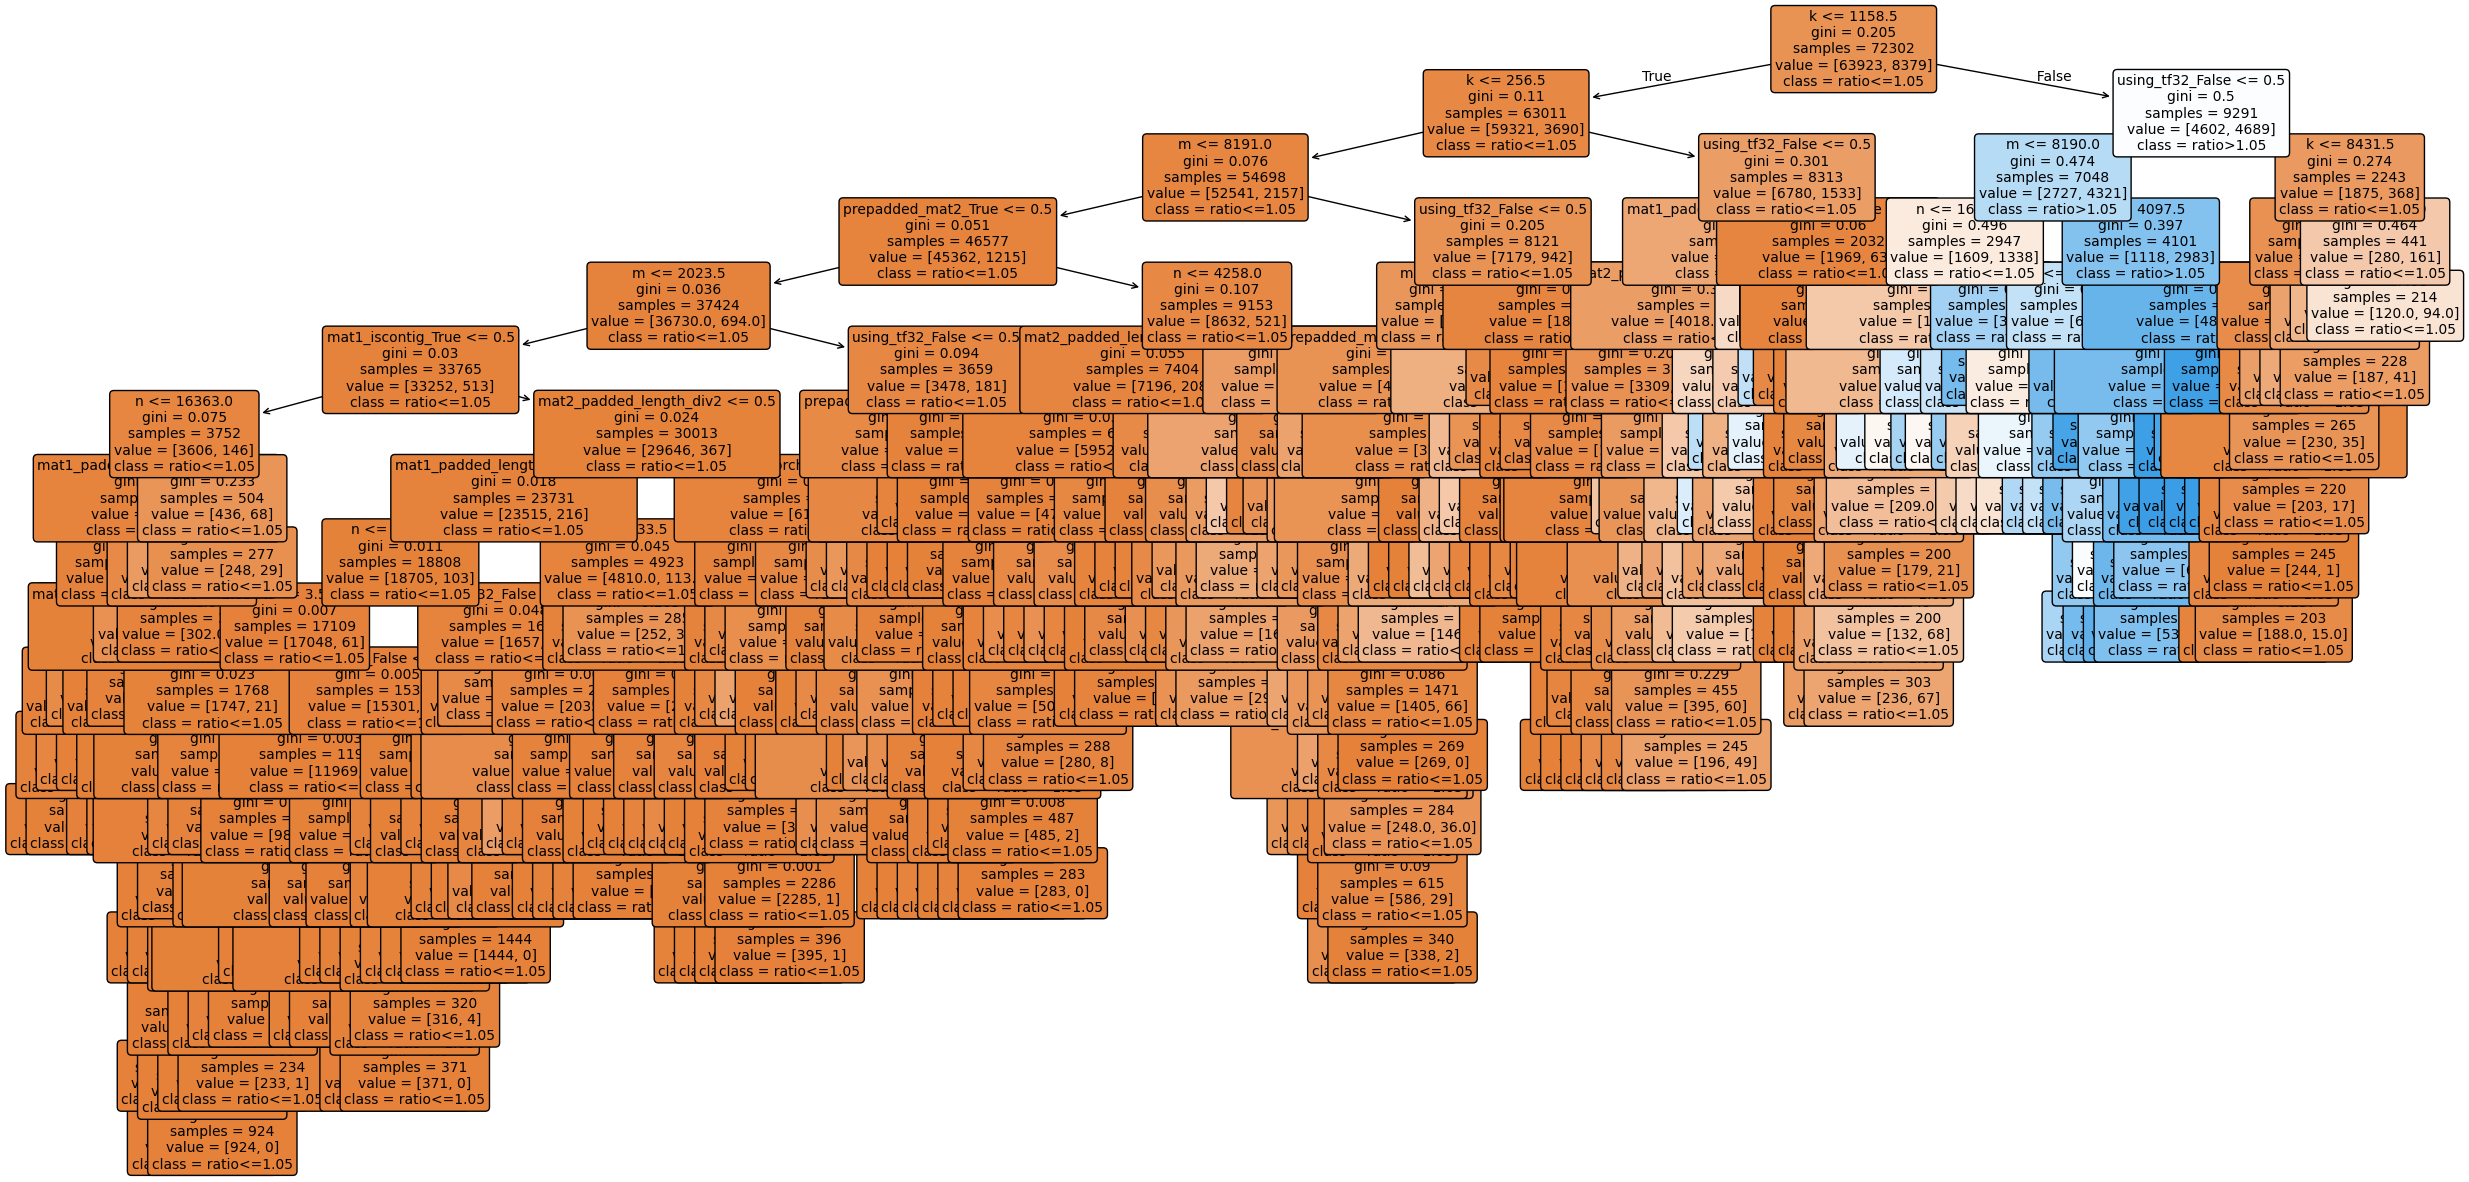

In [258]:
trained_tree = pipeline.named_steps['classifier'].tree

# Get feature names after preprocessing
preprocessor = pipeline.named_steps['preprocessor']
feature_names = (
    list(numeric_features) +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Create a figure with a larger size
plt.figure(figsize=(30,15))

# Plot the tree
plot_tree(trained_tree, 
          feature_names=feature_names, 
          class_names=['ratio<=1.05', 'ratio>1.05'],
          filled=True, 
          rounded=True, 
          fontsize=10)

# Show the plot
plt.show()